In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import ElasticNet
import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_excel("estimate_power_consumption.xlsx")
data.head()

,unit_no,maxa,maxr,active,reactive,consumption
0,1,1322,1043,26815.0,568.0,264.452105
1,2,1316,1032,24773.0,253.0,39.563698
2,4,1345,1005,26820.0,112.0,191.193007
3,6,1336,1013,25470.0,150.0,185.514004
4,1,1320,1038,26875.0,636.0,216.559192


In [14]:
data.isnull().sum()

unit_no        0
maxa           0
maxr           0
active         0
reactive       0
consumption    0
dtype: int64

In [15]:
X = data[["unit_no","maxa","maxr","active","reactive"]]
y = data[["consumption"]]
y

,consumption
0,264.452105
1,39.563698
2,191.193007
3,185.514004
4,216.559192
...,...
994,2260.499827
995,2399.545032
996,165.448196
997,174.534605


In [16]:
X

,unit_no,maxa,maxr,active,reactive
0,1,1322,1043,26815.000000,568.000000
1,2,1316,1032,24773.000000,253.000000
2,4,1345,1005,26820.000000,112.000000
3,6,1336,1013,25470.000000,150.000000
4,1,1320,1038,26875.000000,636.000000
...,...,...,...,...,...
994,8,1340,1007,27237.512695,125.000000
995,9,1347,1007,27490.889893,145.016361
996,1,1314,1035,26708.000000,262.000000
997,2,1309,1022,26580.000000,232.000000


In [17]:
data.isnull().sum()

unit_no        0
maxa           0
maxr           0
active         0
reactive       0
consumption    0
dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [20]:
# Training the Decision Tree Regression model on the whole dataset
model = ElasticNet()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [21]:
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print("Mean squared error:",mse)
print("R-squared:",r2)

Mean squared error: 387105.95288722863
R-squared: -0.6055066715188488


# Tuning the hyperparameters

### with GridSearchView

In [22]:
# Define the SVR model
model1 = ElasticNet()

# Define the hyperparameters to tune
param_grid = {'alpha': np.logspace(-4, 4, 100),
              'l1_ratio': np.linspace(0, 1, 100)}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model1, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'alpha': 1.592282793341094, 'l1_ratio': 1.0}
Best score: 0.6482382484718823


In [23]:
regressor =ElasticNet(**grid_search.best_params_)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

In [24]:
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print("Mean squared error:",mse)
print("R-squared:",r2)

Mean squared error: 336626.135251122
R-squared: 0.437068478124495


### with RandomizedSearchCV

In [25]:
model2 = ElasticNet()
search = RandomizedSearchCV(model2, param_grid, cv=5, n_iter=50, random_state=42)

In [26]:
search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=ElasticNet(), n_iter=50,
                   param_distributions={'alpha': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2....
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747475,
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])},
                   random_state=42)

In [27]:
print("Best hyperparameters: ", search.best_params_)
print("Best score: ", search.best_score_)

Best hyperparameters:  {'l1_ratio': 0.4747474747474748, 'alpha': 0.0041320124001153384}
Best score:  0.6481526081252572


In [28]:
regressor =ElasticNet(l1_ratio=0.9090909090909092,alpha= 0.1176811952434999)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

In [29]:
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print("Mean squared error:",mse)
print("R-squared:",r2)

Mean squared error: 334504.33288147737
R-squared: 0.4264822766720382


# Trying dimension reduction for the model

### PCA

In [30]:
# Apply PCA to reduce the number of features to 3
pca = PCA(n_components=X.shape[1])
X_train_pca = pca.fit_transform(X_train)

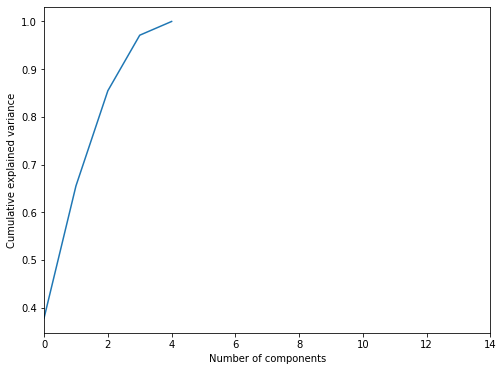

In [31]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

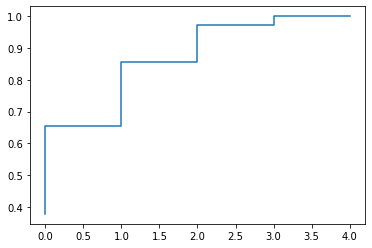

In [32]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

In [33]:
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)
print()


[0.37830093 0.27694897 0.19948261 0.11645653 0.02881096]



In [34]:
pipeline = Pipeline([
    ('pca', PCA(n_components=X.shape[1])),
    ('el', ElasticNet(**grid_search.best_params_))
])

In [35]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [36]:
# Calculate Mean Squared Error (MSE) of the predictions 
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print("Mean squared error:",mse)
print("R-squared:",r2)

Mean squared error: 337046.62241241866
R-squared: 0.436656398454742


### t-SNE

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [42]:
tsne = TSNE(n_components=X.shape[1], random_state=42)

In [43]:
X_train = tsne.fit_transform(X_train)
X_test = tsne.fit_transform(X_test)

ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.

In [ ]:
regressor =ElasticNet(l1_ratio=0.9090909090909092,alpha= 0.1176811952434999)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

In [ ]:
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print("Mean squared error:",mse)
print("R-squared:",r2)